<div style="background:black">
    <center>
<img src="./images/session4/title.png" alt="Title"/>
    </center>
</div>


<div class="alert alert-block alert-success">
<center>
Today's objectives<br/><br/>
    </center>
    &#x25a2; Practice with a <b>real cluster</b><br/><br/>
    &#x25a2; Get familiar with the concept of <b>data streams</b><br/>
    &#x25a2; Practice with Spark's <b>DStream</b> API<br/>
    &#x25a2; Analyze a data stream for <b>Human Activity Recognition</b> in the Internet of Things
</div>


# Cluster deployment

<div class="alert alert-block alert-info">
    An <b>HDFS</b> and <b>YARN</b> cluster was deployed by the Ericsson support team. We will use it to practice with HDFS and with Spark applications.
</div>

## More on HDFS

See slides <a href="pdf/session4/HDFS_intro.pdf">here</a>

## HDFS examples

HDFS is accessible using command <code>hdfs dfs</code>

<ul style="list-style-image: url('images/do.png');">
    <li>Open a terminal and skim through the output of <code>hdfs dfs --help</code></li>
</ul>

Given that the file system is available at <code>hdfs://10.0.2.8:9000</code> (use this URL with option <code>--fs</code> of <code>hdfs df</code>):
            
            
<ul style="list-style-image: url('images/do.png');">
    <li>List the root directory (<code>/</code>) of the file system</li>
</ul>

<ul style="list-style-image: url('images/do.png');">
    <li>Create a directory named after your name under <code>/user</code></li>
</ul>

<ul style="list-style-image: url('images/do.png');">
    <li>Create a text file and upload it to your directory</li>
</ul>

<ul style="list-style-image: url('images/do.png');">
    <li>Using the <code>cat</code> command, display the content of the text file as stored on the HDFS</li>
</ul>

<ul style="list-style-image: url('images/do.png');">
    <li>Download the text file again, and check its content</li>
</ul>

<ul style="list-style-image: url('images/do.png');">
    <li>Remove the text file from HDFS</li>
</ul>

<ul style="list-style-image: url('images/do.png');">
    <li>Using command <code>hdfs fsck</code>, inspect the status of the files under your directory</li>
</ul>


## Quiz

<div class="alert alert-block alert-info">
HDFS data nodes are also compute nodes:<br/>
&#x25a2; True
    
&#x25a2; False
</div>

<div class="alert alert-block alert-info">
HDFS data nodes are also compute nodes:<br/>
&#x2611; True
    
&#x25a2; False
</div>
This is a key feature to ensure data locality (see Session 1, Key concept 3).

<div class="alert alert-block alert-warning">
HDFS allows clusters to scale horizontally, which is very cost-efficient:<br/>
&#x25a2; True
    
&#x25a2;  False
</div>

<div class="alert alert-block alert-warning">
HDFS allows clusters to scale horizontally, which is very cost-efficient:<br/>
    &#x25a2; True
    
&#x2611; False
</div>

Since all cluster nodes are both compute and storage nodes in an HDFS cluster, adding more nodes to the cluster increases the overall storage and compute capacity of the infrastucture. This is called <b>horizontal scaling</b>. Horizontal scaling in HDFS is very cost efficient to adjust the infrastructure to data-intensive applications of various sizes. However, HDFS wouldn't be a cost-effective model when the cluster needs to accomodate a <b>mix of data-intensive and compute-intensive applications</b>. In this case, storage available on compute nodes would remain unused when compte-intensive applications are run.

<div class="alert alert-block alert-info">
It is important for data stored on HDFS to remain balanced among data nodes:<br/>
&#x25a2; True
    
&#x25a2; False
</div>


<div class="alert alert-block alert-info">
It is important for data stored on HDFS to remain balanced among data nodes:<br/>
&#x2611; True
    
&#x25a2; False
</div>
An imbalanced cluster is detrimental to both performance and reliability.

## Running Spark on a cluster

See slides [here](https://docs.google.com/presentation/d/1ub1Rlpe-18RZ_f432k8wx9TB-8YYl8DOrZRcIzNp9pA/edit#slide=id.p)

Spark jobs can be submitted to a cluster using command <code>spark-submit</code>

<ul style="list-style-image: url('images/do.png');">
    <li>Open a terminal and skim through the output of <code>spark-submit --help</code></li>
</ul>

File <code>test_cluster/spark_test.py</code> contains a simple Spark program.

<ul style="list-style-image: url('images/do.png');">
    <li>Run this script with <code>spark-submit</code>, without using any option. The default deploy mode is standalone (the program runs locally).</li>
</ul>

<ul style="list-style-image: url('images/do.png');">
    <li>Submit this script to the Spark cluster, keeping in mind that:
    <ol>
        <li>The scheduler is YARN</li>
        <li>The deply mode must be <code>cluster</code>
        <li>You will need to use the following option in <code>spark-submit</code>: <code>--conf spark.yarn.stagingDir=hdfs://10.0.2.8:9000/user</code>
        </ol> 
    </li>
</ul>

<center>
<div class="alert alert-block alert-success">
   Spark can also read files from HDFS
    </div>
    </center>


File <code>session1_cluster.py</code> contains a Spark program extracted from the use case in session 1. It takes a single argument, the tree file to process (for instance <code>data/session1/frenepublicinjection2015.csv</code>).
    
<ul style="list-style-image: url('images/do.png');">
    <li>Run this Spark program <b>locally</b>, on a <b>local file</b>.</li>
</ul>


<ul style="list-style-image: url('images/do.png');">
        <li>Upload the input file to HDFS and run the Spark program <b>locally</b>, on the <b>HDFS file</b>.</li>
</ul>


<ul style="list-style-image: url('images/do.png');">
        <li>Run the Spark program <b>on the cluster</b>, on the <b>HDFS file</b>.</li>
</ul>

# Introduction to data streams

See slides [here](https://docs.google.com/presentation/d/1NtjwD80gHwuCyloC4TmH-_tZyCumz52Ise_jrRWPG5s/edit?usp=sharing)

# Spark data stream APIs

<center>
<div class="alert alert-block alert-info">
   Spark has two APIs to handle data streams: <a href="http://spark.apache.org/docs/latest/structured-streaming-programming-guide.html"><b>Structured Streaming</b></a> (DataFrames) and <a href="http://spark.apache.org/docs/latest/streaming-programming-guide.html"><b>Discretized Streams</b></a> (RDDs).
    </div>
    </center>

## Discretized Streams (DStream)

DStreams work by splitting input data into batches, represented as RDDs:

<img src="http://spark.apache.org/docs/latest/img/streaming-flow.png"/>

<center>
<div class="alert alert-block alert-success">
   Batches can be processed using Spark's core RDD API:
    </div>
    </center>

<img src="https://spark.apache.org/docs/latest/img/streaming-dstream-ops.png" alt="stream-rdd"/>

In real life, streams originate in sources such as:
- Twitter
- [Apache Kafka](http://kafka.apache.org)
- [Apache Flume](https://flume.apache.org/)

Data stream sources in Spark:
<ul>
    <li> Files: <a href="http://spark.apache.org/docs/latest/api/python/pyspark.streaming.html?highlight=textfilestream#pyspark.streaming.StreamingContext.textFileStream"><code>textFileStream</code></a></li>
    <li>Network: <a href="http://spark.apache.org/docs/latest/api/python/pyspark.streaming.html?highlight=textfilestream#pyspark.streaming.StreamingContext.socketTextStream"><code>socketTextStream</code></a></li>
    <li>A list of RDDS: <a href="http://spark.apache.org/docs/latest/api/python/pyspark.streaming.html#pyspark.streaming.StreamingContext.queueStream"><code>queueStream</code></a></li>

<center>
<div class="alert alert-block alert-info">
    In this session we will use <code>queueStream</code>, to simplify deployment
    </div>
    </center>

A stream is created from a dedicated stream context:

In [1]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext

sc = SparkContext.getOrCreate() 
ssc = StreamingContext(sc, 1) # Batches will be pulled every second

In this example, we will implement classical WordCount. Our stream will be simulated from a list of RDDs:

In [2]:
rdds = [ sc.parallelize([ "one", "two", "three"]),
           sc.parallelize([ "one", "three", "four"]),
           sc.parallelize(["two", "five", "six"])
         ]

The stream is defined using <code>queueStream</code>:

In [3]:
stream = ssc.queueStream(rdds)

Many transformations available on RDDs can be directly applied to DStreams, as documented [here](https://spark.apache.org/docs/latest/streaming-programming-guide.html#transformations-on-dstreams). Here we implement a simple MapReduce task on the stream:

In [4]:
pairs = stream.map(lambda word: (word, 1))

In [5]:
# Count each word in each batch
counts = pairs.reduceByKey(lambda x, y: x + y)

# Print the first ten elements of each RDD generated in this DStream to the console
counts.pprint()

Until now, processing hasn't started. The stream will start receiving data when the `start` function is called:

In [6]:
ssc.start()             # Start the computation
ssc.awaitTermination()  # Wait for the computation to terminate

-------------------------------------------
Time: 2020-08-23 23:54:37
-------------------------------------------
('two', 1)
('three', 1)
('one', 1)

-------------------------------------------
Time: 2020-08-23 23:54:38
-------------------------------------------
('three', 1)
('four', 1)
('one', 1)

-------------------------------------------
Time: 2020-08-23 23:54:39
-------------------------------------------
('two', 1)
('five', 1)
('six', 1)

-------------------------------------------
Time: 2020-08-23 23:54:40
-------------------------------------------

-------------------------------------------
Time: 2020-08-23 23:54:41
-------------------------------------------



KeyboardInterrupt: 

The `stop` function terminates the processing:

In [7]:
ssc.stop()

## Example: counting unique elements

<center>
<div class="alert alert-block alert-info">
    <b>Goal</b>: implement the Flajolet-Martin algorithm to count unique elements in a stream
    </div>
    </center>

<center>
<div class="alert alert-block alert-info">
    <b>Step 1</b>: counters and estimation
    </div>
    </center>

We will create $n$ global counters to store the max number of trailing zeros in the binarized output of each hash function.

In Spark, global counters are called <b>accumulators</b>. Thy can be defined as follows:

In [1]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

def get_counter(n):
    counter_name = "counter-"+str(n)
    if (counter_name not in globals()):
        globals()[counter_name] = sc.accumulator(0)
    return globals()[counter_name]


In [2]:
get_counter(752).value

0

In [3]:
get_counter(752).add(3)
get_counter(752).value

3

Let's implement a function to estimate the number of unique elements seen since the counters were initialized. This function will combine estimates obtained in each of <b>n</b> hash function, using the Flajolet-Martin method:

In [4]:
n = 30 

def print_current_estimate():
    '''
    Prints the estimate of unique elements seen since counters initialization
    '''
    estimates = [ 2**(get_counter(i).value) for i in range(n) ]
    
    from statistics import median, mean
    medians = []
    values = []
    for i, x in enumerate(estimates):
        values += [ x ]
        if i % 10 == 9:
            medians += [ median(values) ]
            values = []
            
    print(f'Estimate: {mean(medians)}')

In [5]:
print_current_estimate()

Estimate: 1.0


<center>
<div class="alert alert-block alert-info">
    <b>Step 2</b>: updating counter values with numbers of trailing zeros in hashes
    </div>
    </center>

We will emulate a family of $n$ independent hash functions as follows:

In [6]:
def my_hash(x, n=1):
    return hash(str(x) + str(n))

In [7]:
my_hash("apple", 1)

-3160994978816226525

In [9]:
my_hash("apple", 2)

-4548992735677304821

The `bin`function converts integers to their binary representation:

In [10]:
bin(123)

'0b1111011'

We will need to count the number of trailing zeros in a string:

In [11]:
def count_trailing_zeros(x):
    r = 0
    for i in range(len(x)):
        if int(x[-(i+1)]) == 0:
            r += 1
        else:
            break
    return r

In [12]:
count_trailing_zeros('1000000')

6

In [13]:
def trailing_zeros_in_hash(x, i):
    return count_trailing_zeros(bin(my_hash(x, i)))

In [14]:
trailing_zeros_in_hash('apple', 3)

0

In [15]:
bin(my_hash('apple', 3))

'-0b10011001110011011111001000001000100000001011101001010001011'

<ul style="list-style-image: url('images/do.png');">
    <li>Using the prototype below, write a function that updates the n counters such that counter <cod>i</code> contains 
    the maximum number of trailing zeros seen in the binarized outputs of the elements in <code>rdd</code> by hash function <code>my_hash(x, i)</code>. The function should also print the updated counter values.
    </li>
    Tip: use a MapReduce logic, where:
    <ul>
        <li><code>map</code> produces (i, trailing_zeros_in_hash) pairs</li>
        <li><code>reduce</code> is the max function</li>
</ul>

In [16]:
n = 30

def update_counters(rdd):
    '''
    Parameters
    ----------
    rdd : an RDD of hashable elements

    Returns
    -------
    counters: an RDD with n elements containing updated values of n counters
    '''
    

In [16]:
n = 30

def update_counters(rdd):
    '''
    Parameters
    ----------
    rdd : an RDD of hashable elements

    Returns
    -------
    counters: an RDD with n elements containing updated values of n counters
    '''
    
    maxes = rdd.flatMap(lambda x: [ (i, trailing_zeros_in_hash(x, i)) for i in range(n)])\
               .reduceByKey(lambda x, y: max(x, y))
    
    # Update counters
    for i, m in maxes.collect():  # counter values fit in memory
        val = get_counter(i).value
        if m > val:
            get_counter(i).add(m-val)
    
    # Print new estimate
    print_current_estimate()
    
    # Return RDD containing counter values
    return sc.parallelize([get_counter(i).value for i in range(n)])

In [17]:
# Test
update_counters(sc.parallelize(['apple', 'banana', 'orange'])).collect()

Estimate: 3.3333333333333335


[2,
 2,
 2,
 5,
 1,
 1,
 3,
 7,
 5,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 3,
 1,
 5,
 0,
 5,
 2,
 2]

Let's reset the counters:

In [18]:
def reset_counters():
    for i in range(n):
        counter_name = "counter-"+str(i)
        globals()[counter_name] = sc.accumulator(0)

In [19]:
reset_counters()
get_counter(13).value

0

<center>
<div class="alert alert-block alert-info">
    <b>Step 3</b>: use in a data stream
    </div>
    </center>

Let's define a stream from the list of (non unique) words in 3 text documents from session 1. The true count of unique words in this dataset is <b>721</b>.

In [20]:
import os.path as op
lines = []
for filename in [ 'canada.txt' , 'usa.txt', 'mexico.txt' ]:
    with open(op.join('data', 'session1', 'docs', filename), 'r') as f:
        lines += f.readlines() 

In [22]:
len(lines)

25

Let's create a list of RDDs to be included in a queueStream:

In [23]:
rdds = []
for l in lines:
    rdds += [ sc.parallelize(l.split(' ')) ]

<ul style="list-style-image: url('images/do.png');">
    <li>Using Spark's DStream API, build a data stream from <code>rdds</code>, and apply function <code>update_counters</code> to each RDD in this stream. Tip: use stream transformation <code>transform</code>.
    </li>
</ul>

In [24]:
# Stream context initialization
from pyspark.streaming import StreamingContext
ssc = StreamingContext(sc, 1)
stream = ssc.queueStream(rdds)

In [25]:
# Apply transformation
estimates = stream.transform(update_counters)

In [26]:
# Print RDD (counter values) and run
estimates.pprint()

ssc.start()
ssc.awaitTermination()

Estimate: 74.66666666666667
-------------------------------------------
Time: 2020-08-23 23:56:31
-------------------------------------------
5
6
5
6
10
6
5
8
7
7
...

Estimate: 85.33333333333333
-------------------------------------------
Time: 2020-08-23 23:56:32
-------------------------------------------
5
10
5
6
10
6
5
8
7
7
...

Estimate: 192.0
-------------------------------------------
Time: 2020-08-23 23:56:33
-------------------------------------------
5
10
6
6
10
6
9
8
9
7
...

Estimate: 192.0
-------------------------------------------
Time: 2020-08-23 23:56:34
-------------------------------------------
5
10
6
6
10
6
9
8
9
7
...

Estimate: 234.66666666666666
-------------------------------------------
Time: 2020-08-23 23:56:35
-------------------------------------------
5
10
6
6
10
7
9
8
9
7
...

Estimate: 234.66666666666666
-------------------------------------------
Time: 2020-08-23 23:56:36
-------------------------------------------
5
10
6
6
10
7
9
8
9
7
...

Estimate:

KeyboardInterrupt: 

In [27]:
ssc.stop()

## Quiz

<div class="alert alert-block alert-warning">
It is important for hash functions used in Big Data analyses to be cryptographically secure:<br/>
    &#x25a2; True
    
&#x25a2;  False
</div>

<div class="alert alert-block alert-warning">
It is important for hash functions used in Big Data analyses to be cryptographically secure:<br/>
    &#x25a2; True
    
&#x2611; False
</div>

A hash function is said to be cryptographically secure when it is computationally infeasible to retrieve the function argument from the function result. While this property is critical to cyber-security applications, it is often not desirable in Big Data applications, as such applications favor lightweight hash functions.

<div class="alert alert-block alert-info">
It is straightforward to adapt a data analysis to data streams:<br/>
    &#x25a2; True
    
&#x25a2; False
</div>

<div class="alert alert-block alert-info">
It is straightforward to adapt a data analysis to data streams:<br/>
    &#x25a2; True
    
&#x2611; False
</div>

Many analyses require to access the entire dataset. This is for instance the case of <b>kmeans clustering</b> or classification with <b>decision trees</b>. Stream-compatible adaptations of these algorithms are sometimes far from trivial!

<div class="alert alert-block alert-warning">
Data streams should always be analyzed with stream algorithms:<br/>
    &#x25a2; True
    
&#x25a2; False
</div>

<div class="alert alert-block alert-warning">
Data streams should always be analyzed with stream algorithms:<br/>
    &#x25a2; True
    
&#x2611; False
</div>

Stream algorithms are required when the elements of the data stream encountered so far cannot be analyzed as a whole. This is often the case when:
<ol>
    <li>Processing, memory and/or storage resources are limited. This is for instance the case on <b>connected objects</b>.</li>
    <li>Results are required in near real-time</li>
</ol>
In other cases, it is often possible to store successive versions of the data stream on disk, and to process this data offline using batch jobs.

# Mini-project: human activity classification from wearable devices

<center>
<div class="alert alert-block alert-info">
    <b>Goal</b>: recognize activites from motion data
    </div>
    </center>

<center>
    <b>Data</b><br/>
REALDISP (<a href="http://archive.ics.uci.edu/ml/datasets/REALDISP+Activity+Recognition+Dataset">link</a>), available in <code>data/session4/subject16_ideal.log</code>.<br/><br/>
    <b>Input</b><br/>
    9 wearable sensors with 3D acceleration, 3D gyroscope, 3D magnetic field orientation, 4D quaternions
    <img src="images/session4/sensors.png"/><br/>
    <b>Output</b><br/>
    1 of 33 activity classes:<br/>
A1: Walking<br/>
A2: Jogging<br/>
A3: Running<br/>
A4: Jump up<br/>
A5: Jump front and back<br/>
...<br/><br/>
<a href="https://dl.acm.org/doi/abs/10.1145/2370216.2370437?casa_token=dGTbqvHRvF8AAAAA:Je-UwL8fV_iBLme62kNbeKiPfejHh0qBVTb61Ncm204F0ja2Ceb53Sp3wQ5lQBjhkoICT4kDYK0VaA">[Banos et al, 2012]</a>
</center>

<center>
<div class="alert alert-block alert-info">
    <b>Method</b>: offline training, online classification
    </div>
    <br/>
We will use data from a single subject 
</center>

<img src="images/session4/diagram.png" alt="diagram"/>

## Data preparation

<center>
<div class="alert alert-block alert-info">
    Let's first have a look at the dataset
    </div>
</center>

In [1]:
! head -n 2 data/session4//subject16_ideal.log

0	20000	-4.0982	6.8202	5.2833	-0.21947	-0.023071	-0.090426	0.69889	-0.4502	-0.38347	0.87182	0.43633	0.18177	-0.12851	-6.9053	6.5669	2.5795	0.051219	-0.033998	0.036171	0.68862	-0.31062	-0.27972	0.66982	0.58983	0.14648	-0.4266	-9.5958	-1.5332	-0.97097	-0.020319	0.0072178	-0.0083285	0.78669	0.033161	-0.43798	0.11171	-0.7414	0.0065397	0.66167	-7.0427	-6.4594	2.9435	0.091876	0.0041261	-0.034711	0.67318	0.29871	-0.32587	0.65185	-0.58186	0.1194	0.47146	-4.4069	-4.4037	7.4394	0.10223	0.040773	0.065712	0.54168	0.27363	-0.51561	0.9322	-0.27024	0.20888	0.11972	-9.7026	0.98771	-1.2288	0.010155	-0.013687	-0.0072899	0.70737	0.28763	0.31091	0.59418	0.39604	0.63691	-0.29059	-9.364	2.1562	-1.7392	0.018375	0.0037066	-0.012104	0.73205	-0.17165	0.37634	0.63648	0.081812	0.76313	0.076436	-9.6932	-0.25947	1.1732	-0.0035351	-0.00092841	0.015692	0.85763	0.053082	0.13381	0.74616	0.033205	0.66245	-0.057451	-8.8386	-0.73906	-3.9927	-0.0056586	-0.0050973	-0.0065629	0.37301	1.0266	0.51763	0.41957	0.47703	0.69115	-0

<center>
<div class="alert alert-block alert-info">
    Records are tab-separated
    </div>
</center>

### Data loading

<center>
<div class="alert alert-block alert-info">
    Let's load the data and look at the class distribution
    </div>
</center>

In [2]:
filename = 'data/session4/subject16_ideal.log'

# read dataset
with open(filename, 'r') as f:
    lines = f.readlines()

# split and parse to float
records = [ [float(val) for val in line.split('\t')] for line in lines ]   

In [3]:
# sanity check
records[17]

[0.0,
 360000.0,
 -2.9523,
 7.3393,
 5.2578,
 0.46855,
 -0.082286,
 0.10457,
 0.68147,
 -0.48533,
 -0.38295,
 0.86961,
 0.44623,
 0.17245,
 -0.12215,
 -6.0363,
 6.8648,
 2.3088,
 -0.032568,
 -0.080854,
 0.048169,
 0.68219,
 -0.32028,
 -0.28306,
 0.6706,
 0.5898,
 0.13953,
 -0.42774,
 -9.7012,
 -1.3418,
 -1.128,
 -0.07854,
 -0.058045,
 -0.018631,
 0.78411,
 0.041913,
 -0.44126,
 0.11236,
 -0.74073,
 0.0033079,
 0.66233,
 -7.1115,
 -6.4286,
 2.7323,
 -0.042749,
 -0.0077861,
 0.021573,
 0.67685,
 0.30288,
 -0.32116,
 0.64423,
 -0.58441,
 0.11954,
 0.47869,
 -4.4917,
 -4.5203,
 7.4853,
 -0.0073611,
 0.046568,
 -0.03297,
 0.54071,
 0.27299,
 -0.51871,
 0.93384,
 -0.27261,
 0.19968,
 0.11727,
 -9.6514,
 0.87418,
 -1.2795,
 -0.016503,
 0.0089659,
 0.0010202,
 0.70484,
 0.29383,
 0.31349,
 0.59105,
 0.39561,
 0.63881,
 -0.29337,
 -9.3331,
 2.1901,
 -1.7682,
 -0.0015456,
 0.012658,
 -0.011354,
 0.73498,
 -0.16891,
 0.37529,
 0.63734,
 0.079488,
 0.76267,
 0.076207,
 -9.7784,
 -0.11993,
 1.073,


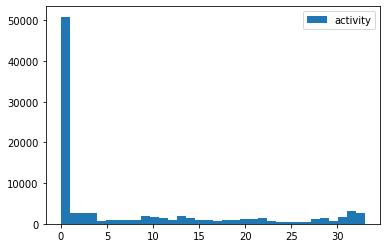

In [4]:
from matplotlib import pyplot as plt
plt.hist([record[-1] for record in records], bins=34, label='activity')
plt.legend()
plt.show()

<center>
<div class="alert alert-block alert-info">
    Dataset is strongly <b>imbalanced</b>
    </div>
</center>

### Windowing

<center>
<div class="alert alert-block alert-info">
    We will group records in <b>windows of 50 records</b>
    </div>
</center>

In [5]:
freq = 50  # in Hz, also number of elements in 1-s windows
windows = []
record = []
for i, vals in enumerate(records):
    record += [ vals[2:8] + [ vals[119] ]  ] # keep 6 parameters + class
    if (i + 1) % freq == 0: # create a new window
        windows += [ record ]
        record = []

# sanity check
len(windows[17])

50

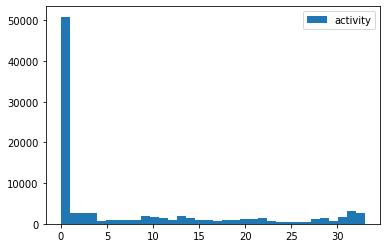

In [6]:
# Sanity check
from matplotlib import pyplot as plt
plt.hist([record[-1] for window in windows for record in window], bins=34, label='activity')
plt.legend()
plt.show()

### Train/test set

<center>
<div class="alert alert-block alert-info">
    The split in train/test set is done on the <b>time windows</b> (not the individual records).
    </div>
</center>

In [7]:
import random
random.shuffle(windows)
split = round(len(windows)*0.7)
train_windows, test_windows = windows[:split], windows[split:]
len(train_windows), len(test_windows), len(windows)

(1328, 569, 1897)

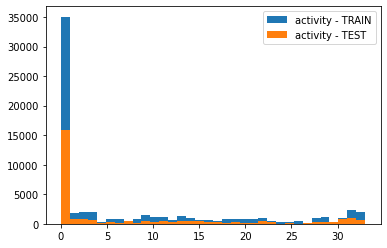

In [8]:
# Sanity check
from matplotlib import pyplot as plt
plt.hist([record[-1] for window in train_windows for record in window], bins=34, label='activity - TRAIN')
plt.hist([record[-1] for window in test_windows for record in window], bins=34, label='activity - TEST')
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<center>
Class distributions are similar in the train and test set</center>

## Offline training

### Features

<div class="alert alert-block alert-info">
<center>
    As features, we use the <b>mean</b> and <b>standard deviation</b> in each time window</center>

<div class="alert alert-block alert-info">
<center>
    The label of a time window is the <b>most frequent label</b> in the time window</center>

In [9]:
from statistics import mode, mean, stdev
def compute_features_and_class(window):
    return    (  [ mean([ float(x[i]) for x in window ]) for i in range(6) ]
               + [ stdev([ float(x[i]) for x in window ]) for i in range(6) ]
               + [ mode( [int(x[6]) for x in window] ) ])
compute_features_and_class(train_windows[0])

[-9.27777176,
 7.07283,
 -2.972504,
 0.054637794,
 -0.19040020000000005,
 0.2563525,
 5.740398460030789,
 1.5477710547949992,
 12.722240967337637,
 1.4981119104218672,
 5.102485998778694,
 0.6340781531710634,
 21]

In [10]:
# Let's iterate on all the features
train_features = [ compute_features_and_class(window) for window in train_windows ]

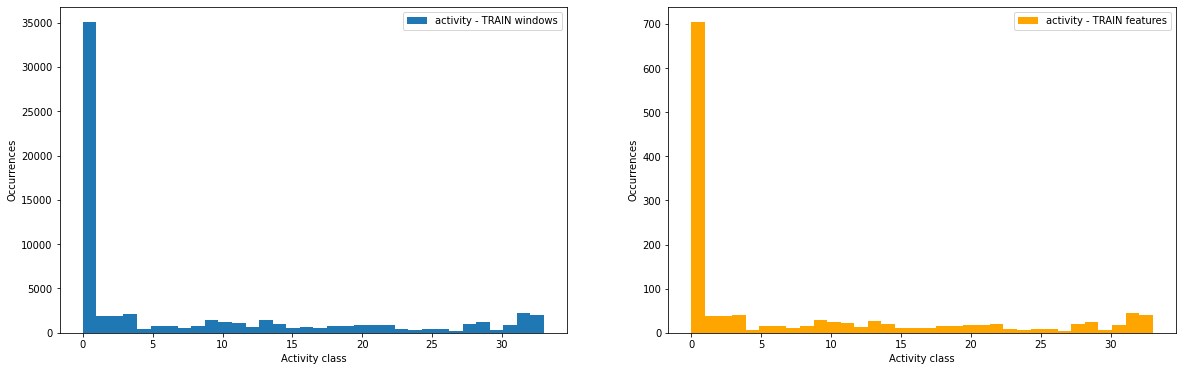

In [11]:
# Sanity check 

from matplotlib import pyplot as plt
_, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

ax1.hist([record[-1] for window in train_windows for record in window], bins=34, label='activity - TRAIN windows')
ax1.set_ylabel('Occurrences')
ax1.set_xlabel('Activity class')
ax1.legend()

ax2.hist([c[-1] for c in train_features], bins=34, color='orange', label='activity - TRAIN features')
ax2.set_ylabel('Occurrences')
ax2.set_xlabel('Activity class')
ax2.legend()

plt.show()

### Model

<div class="alert alert-block alert-info">
<center>
    We will train a <b>Random Forest</b> on the dataset, using Spark's MLlib (see session 3)</center>

In [12]:
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .getOrCreate()


<ul style="list-style-image: url('images/do.png');">
    <li>Starting from <code>train_features</code>, load the data in a DataFrame where each column represent a feature, and the true label is in the last column</li>
</ul>

In [13]:
col_names = ['mean_AccX', 'mean_AccY', 'mean_AccZ', 'mean_GyrX', 'mean_GyrY', 'mean_GyrZ',
             'std_AccX', 'std_AccY', 'std_AccZ', 'std_GyrX', 'std_GyrY', 'std_GyrZ',
             'class']

In [14]:
train_df = spark.createDataFrame(train_features, schema=col_names)
train_df.toPandas()

,mean_AccX,mean_AccY,mean_AccZ,mean_GyrX,mean_GyrY,mean_GyrZ,std_AccX,std_AccY,std_AccZ,std_GyrX,std_GyrY,std_GyrZ,class
0,-9.277772,7.072830,-2.972504,0.054638,-0.190400,0.256352,5.740398,1.547771,12.722241,1.498112,5.102486,0.634078,21
1,-33.658660,8.441315,-2.728294,1.435294,-4.421544,-6.329356,8.933161,5.537932,6.653695,0.742967,1.149046,0.904648,9
2,-4.842634,2.261846,-6.877506,-1.305340,-1.040470,-0.098374,1.915838,2.275789,3.567613,2.027404,1.326694,0.428981,0
3,-8.316804,12.560792,-1.914586,1.290427,-2.057743,-0.921491,10.274701,14.258585,7.211434,1.610240,2.047358,4.063954,18
4,-9.272088,3.023230,0.978256,-0.020847,0.002024,0.004855,0.022914,0.049002,0.015065,0.020126,0.007413,0.008985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,-5.338520,4.522647,-16.487013,1.352119,0.259184,0.642164,11.742899,18.587183,15.604057,7.100303,2.510576,2.433950,8
1324,0.924871,8.986946,-3.799490,0.033595,-0.021059,0.030293,0.125625,0.084867,0.121785,0.039293,0.150151,0.048905,0
1325,-5.519380,6.577752,4.927564,-0.053105,-0.069746,-0.047624,1.197138,1.632986,1.303450,1.191563,0.622181,0.418999,33
1326,-0.709205,6.958432,6.457734,0.057365,-0.044912,0.137892,1.888002,1.979732,1.896042,0.912333,0.515640,0.617818,0



<ul style="list-style-image: url('images/do.png');">
    <li>Following the example detailed in Session 3, use a <code>VectorAssembler</code> to create a column named <code>features</code> containing the features to be used by the classifier</li>
</ul>

In [15]:
stages = []


from pyspark.ml.feature import VectorAssembler
assemblerInputs = [c for c in train_df.columns if c != 'class']
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

# Transformation pipeline
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(train_df)
transformed_df_train = pipelineModel.transform(train_df)
transformed_df_train.toPandas()

,mean_AccX,mean_AccY,mean_AccZ,mean_GyrX,mean_GyrY,mean_GyrZ,std_AccX,std_AccY,std_AccZ,std_GyrX,std_GyrY,std_GyrZ,class,features
0,-9.277772,7.072830,-2.972504,0.054638,-0.190400,0.256352,5.740398,1.547771,12.722241,1.498112,5.102486,0.634078,21,"[-9.27777176, 7.07283, -2.972504, 0.054637794,..."
1,-33.658660,8.441315,-2.728294,1.435294,-4.421544,-6.329356,8.933161,5.537932,6.653695,0.742967,1.149046,0.904648,9,"[-33.65866, 8.4413148, -2.7282942, 1.43529374,..."
2,-4.842634,2.261846,-6.877506,-1.305340,-1.040470,-0.098374,1.915838,2.275789,3.567613,2.027404,1.326694,0.428981,0,"[-4.842634, 2.26184574, -6.877506, -1.30534022..."
3,-8.316804,12.560792,-1.914586,1.290427,-2.057743,-0.921491,10.274701,14.258585,7.211434,1.610240,2.047358,4.063954,18,"[-8.316803502, 12.560792, -1.91458556, 1.29042..."
4,-9.272088,3.023230,0.978256,-0.020847,0.002024,0.004855,0.022914,0.049002,0.015065,0.020126,0.007413,0.008985,0,"[-9.272088, 3.02323, 0.9782558, -0.020846562, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,-5.338520,4.522647,-16.487013,1.352119,0.259184,0.642164,11.742899,18.587183,15.604057,7.100303,2.510576,2.433950,8,"[-5.3385196, 4.5226474, -16.4870134, 1.3521186..."
1324,0.924871,8.986946,-3.799490,0.033595,-0.021059,0.030293,0.125625,0.084867,0.121785,0.039293,0.150151,0.048905,0,"[0.9248712, 8.986946, -3.79949, 0.033595394, -..."
1325,-5.519380,6.577752,4.927564,-0.053105,-0.069746,-0.047624,1.197138,1.632986,1.303450,1.191563,0.622181,0.418999,33,"[-5.51938, 6.577752, 4.927564, -0.053105200000..."
1326,-0.709205,6.958432,6.457734,0.057365,-0.044912,0.137892,1.888002,1.979732,1.896042,0.912333,0.515640,0.617818,0,"[-0.70920478, 6.958432, 6.457734, 0.0573649380..."



<ul style="list-style-image: url('images/do.png');">
    <li>Train a Random Forest from this DataFrame</li>
</ul>

In [16]:
# Training of RF model
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'class', numTrees=100)
rfModel = rf.fit(transformed_df_train)

### Offline classification

<div class="alert alert-block alert-info">
<center>
    As a sanity check, we will compute the offline accuracy of this Random Forest</center>

First, let's compute the features of the test dataset:

In [17]:
test_features = [ compute_features_and_class(window) for window in test_windows ]


<ul style="list-style-image: url('images/do.png');">
    <li>Convert this list of features to a Spark DataFrame</li>
</ul>


In [18]:
test_df = spark.createDataFrame(test_features, schema=col_names)
test_df.toPandas()

,mean_AccX,mean_AccY,mean_AccZ,mean_GyrX,mean_GyrY,mean_GyrZ,std_AccX,std_AccY,std_AccZ,std_GyrX,std_GyrY,std_GyrZ,class
0,-16.874249,6.379612,0.755559,-0.455446,0.898207,-0.171949,8.900787,22.559886,13.132215,1.631634,2.184328,6.995526,7
1,-5.509256,7.577492,-2.709814,-0.007802,-0.070509,-0.008020,0.728162,0.829952,0.761546,0.649376,0.316570,0.164857,0
2,-9.217536,3.504558,-0.149572,0.051212,-0.011258,0.027453,0.670000,0.416690,0.623554,0.331933,0.191588,0.499171,0
3,-9.446538,3.046514,-0.999070,-0.219224,-0.034354,-0.194615,3.385845,1.001966,0.538255,0.286427,0.162320,0.216648,14
4,-9.709964,3.283170,0.685121,0.236944,-0.338438,-0.087560,2.581753,1.276156,1.361576,1.114368,0.741009,1.250447,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-3.938132,1.209068,-8.828402,-0.005916,-0.014424,0.006550,0.042085,0.087324,0.059645,0.062279,0.037851,0.139541,0
565,-9.230124,3.151878,0.884180,0.001674,-0.010096,0.008694,0.049061,0.103890,0.054602,0.051782,0.014355,0.011477,0
566,-7.255482,6.692198,-0.065250,0.044673,-0.678503,-0.098862,0.837362,1.878414,1.432180,0.956850,1.103757,0.476862,0
567,-8.380708,4.587714,0.380865,-0.055492,0.341001,0.321720,1.480021,2.098585,0.690005,0.624379,0.638861,0.386531,0


<ul style="list-style-image: url('images/do.png');">
    <li>Build and run an MLlib pipeline to predict class labels from the Random Forest model:</li>
</ul>


In [19]:
stages = []


from pyspark.ml.feature import VectorAssembler
assemblerInputs = [c for c in test_df.columns if c != 'class']
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

# Transformation pipeline
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(test_df)
transformed_df_test = pipelineModel.transform(test_df)
predictions = rfModel.transform(transformed_df_test)

predictions.toPandas()

,mean_AccX,mean_AccY,mean_AccZ,mean_GyrX,mean_GyrY,mean_GyrZ,std_AccX,std_AccY,std_AccZ,std_GyrX,std_GyrY,std_GyrZ,class,features,rawPrediction,probability,prediction
0,-16.874249,6.379612,0.755559,-0.455446,0.898207,-0.171949,8.900787,22.559886,13.132215,1.631634,2.184328,6.995526,7,"[-16.87424938, 6.379612, 0.7555589968, -0.4554...","[2.9258227833428885, 0.026763336913712854, 0.3...","[0.02925822783342888, 0.0002676333691371285, 0...",7.0
1,-5.509256,7.577492,-2.709814,-0.007802,-0.070509,-0.008020,0.728162,0.829952,0.761546,0.649376,0.316570,0.164857,0,"[-5.509256, 7.577492, -2.709814, -0.0078018200...","[94.27596172960328, 1.5773141698459048, 0.0462...","[0.9427596172960325, 0.015773141698459045, 0.0...",0.0
2,-9.217536,3.504558,-0.149572,0.051212,-0.011258,0.027453,0.670000,0.416690,0.623554,0.331933,0.191588,0.499171,0,"[-9.217536, 3.504558, -0.149571614, 0.05121213...","[93.52054064725993, 2.5245008403109956, 0.0273...","[0.9352054064725992, 0.025245008403109954, 0.0...",0.0
3,-9.446538,3.046514,-0.999070,-0.219224,-0.034354,-0.194615,3.385845,1.001966,0.538255,0.286427,0.162320,0.216648,14,"[-9.446538, 3.046514, -0.99906978, -0.21922423...","[31.58739520731074, 1.6350702169460236, 0.1902...","[0.3158739520731075, 0.01635070216946024, 0.00...",14.0
4,-9.709964,3.283170,0.685121,0.236944,-0.338438,-0.087560,2.581753,1.276156,1.361576,1.114368,0.741009,1.250447,1,"[-9.709964, 3.2831698, 0.68512104, 0.236944379...","[65.46482955324035, 9.21363754111709, 0.343560...","[0.6546482955324032, 0.09213637541117085, 0.00...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-3.938132,1.209068,-8.828402,-0.005916,-0.014424,0.006550,0.042085,0.087324,0.059645,0.062279,0.037851,0.139541,0,"[-3.938132, 1.209068, -8.828402, -0.005915526,...","[98.33424324719371, 0.6583658620258274, 0.0142...","[0.9833424324719366, 0.006583658620258271, 0.0...",0.0
565,-9.230124,3.151878,0.884180,0.001674,-0.010096,0.008694,0.049061,0.103890,0.054602,0.051782,0.014355,0.011477,0,"[-9.230124, 3.151878, 0.88418, 0.0016735879999...","[98.41846167886212, 0.6911961627095625, 0.0142...","[0.9841846167886209, 0.006911961627095623, 0.0...",0.0
566,-7.255482,6.692198,-0.065250,0.044673,-0.678503,-0.098862,0.837362,1.878414,1.432180,0.956850,1.103757,0.476862,0,"[-7.255482, 6.692198, -0.06525046, 0.044673350...","[78.99689381395261, 7.073438869659726, 0.10771...","[0.7899689381395258, 0.07073438869659723, 0.00...",0.0
567,-8.380708,4.587714,0.380865,-0.055492,0.341001,0.321720,1.480021,2.098585,0.690005,0.624379,0.638861,0.386531,0,"[-8.380708, 4.587714, 0.38086474000000003, -0....","[77.5512156604287, 8.382840184515178, 0.102403...","[0.7755121566042869, 0.08382840184515176, 0.00...",0.0


<ul style="list-style-image: url('images/do.png');">
    <li>Compute the accuracy of this model:</li>
</ul>


In [20]:
total = predictions.count()
correct = predictions.where(predictions['prediction'] == predictions['class']).count()
print(f'Accuracy: {round(correct/total,2)}')

Accuracy: 0.79


<div class="alert alert-block alert-success">
<center>
    This is not too bad. On this dataset, F1 score is around 0.8 when all the subjects are used (see for instance <a href="https://www.mdpi.com/1424-8220/19/22/5026/htm">here</a>)</center>

## Online classification

<div class="alert alert-block alert-info">
<center>
    Let's simulate a data stream using Spark DStream's <a href="http://spark.apache.org/docs/latest/api/python/pyspark.streaming.html#pyspark.streaming.StreamingContext.queueStream">queueStream</a></center>

In [22]:
from pyspark import SparkContext
# We will need a Spark context
sc = SparkContext.getOrCreate()

In [23]:
# A queueStream requires a list of RDDs
rdds = []
record = []
for window in test_windows:
    rdds += [ sc.parallelize(window) ]    

In [24]:
from pyspark.streaming import StreamingContext

# The stream will pull from the queue every second
ssc = StreamingContext(sc, 1)
stream = ssc.queueStream(rdds)

<div class="alert alert-block alert-info">
<center>
    <b>Feature computation</b></center>

<ul style="list-style-image: url('images/do.png');">
    <li>Write a function with the following prototype to compute the features of a time window. Tip: use the following expansion of the variance expression: 
    </li>
</ul>

$$
Var(X) = E[X^2]-E[X]^2,
$$

where $E[X]$ is the average of the values in X.

In [25]:
from math import sqrt 
from statistics import mode

def features_and_class_rdd(window_rdd):
    '''
    Parameters
    ----------
    window_rdd : an RDD containing 50 elements, where each element is a list of length 7 formated as follows:
                     [acc_x, acc_y, acc_z, gyr_x, gyr_y, gyr_z, label]

    Returns
    -------
    stats: an RDD with 1 element, containing the window features and class label, formatted as follows:
                    [ mean_acc_x, mean_acc_y, mean_acc_z, mean_gyr_x, mean_gyr_y, mean_gyr_z,
                      std_acc_x, std_acc_y, std_acc_z, std_gyr_x, std_gyr_y, std_gyr_z,
                      most_freq_label]
    '''


In [25]:
from math import sqrt 
from statistics import mode

def features_and_class_rdd(window_rdd):
    '''
    Parameters
    ----------
    window_rdd : an RDD containing 50 elements, where each element is a list of length 7 formated as follows:
                     [acc_x, acc_y, acc_z, gyr_x, gyr_y, gyr_z, label]

    Returns
    -------
    stats: an RDD with 1 element, containing the window features and class label, formatted as follows:
                    [ mean_acc_x, mean_acc_y, mean_acc_z, mean_gyr_x, mean_gyr_y, mean_gyr_z,
                      std_acc_x, std_acc_y, std_acc_z, std_gyr_x, std_gyr_y, std_gyr_z,
                      most_freq_label]
    '''
    # Put class label in list to compute mode
    # Compute column sum
    # Compute squared column sum
    window_rdd_list = window_rdd.map(lambda x: [ x[i] for i in range(len(x)-1) ] + 
                                               [ x[i]**2 for i in range(len(x)-1)] +
                                               [ [ x[-1] ] ])
    # Compute sums
    agg = window_rdd_list.reduce(lambda x, y: [ x[i] + y[i] for i in range(len(x))])
    
    # Compute average from sum
    # Compute standard deviation from sum of squared values
    # Compute mode
    stats = ([ agg[i]/freq for i in range(6) ] + # average 
            [ sqrt(agg[i]/freq - (agg[i-6]/freq)**2) for i in range(6, 12)] + # use variance expansion
            [ mode(agg[12])] )
      
    return sc.parallelize([ stats ])

In [26]:
# Test function
features_and_class_rdd(rdds[0]).collect()

[[-16.874249380000002,
  6.379612000000002,
  0.7555589967999994,
  -0.45544640000000003,
  0.8982066799999999,
  -0.1719489999999999,
  8.81132913800096,
  22.333147254694218,
  13.000229214457153,
  1.6152348936693512,
  2.162374004536296,
  6.925217307371155,
  7.0]]

In [27]:
compute_features_and_class(rdds[0].collect())

[-16.87424938,
 6.379612,
 0.7555589968,
 -0.45544640000000003,
 0.89820668,
 -0.171949,
 8.900786549638713,
 22.559885527188587,
 13.13221462074588,
 1.6316336378896146,
 2.1843276029558933,
 6.995525884617982,
 7]

<div class="alert alert-block alert-danger">
<center>
    The difference comes from <b>catastrophic cancellations</b> in the variance estimation</center>

<ul style="list-style-image: url('images/do.png');">
    <li>Transform the data stream to compute the features of the time window. Tip: apply <code>features_and_class_rdd</code> to the stream using function <a href="http://spark.apache.org/docs/latest/api/python/pyspark.streaming.html#pyspark.streaming.StreamingContext.transform"><code>transform</code></a></li>
</ul>

In [28]:
features = stream.transform(features_and_class_rdd)

<div class="alert alert-block alert-info">
<center>
    <b>Prediction</b> and <b>evaluation</b></center>

Let's define two counters to store the number of correct and total predictions:

In [29]:
def correct_counter(context):
    if ("correct_predictions" not in globals()):
        globals()["correct_predictions"] = context.accumulator(0)
    return globals()["correct_predictions"]

def total_counter(context):
    if ("total_predictions" not in globals()):
        globals()["total_predictions"] = context.accumulator(0)
    return globals()["total_predictions"]



In [30]:
correct_counter(sc).value

0

<ul style="list-style-image: url('images/do.png');">
    <li>Using the following prototype, write a function that applies the Random Forest model to a 1-element RDD representing a time window.</li>
</ul>

In [31]:

def predict_and_evaluate(features):
    '''
    Parameters
    ----------
    features: an RDD with 1 element, containing the window features and class label, formatted as follows:
                    [ mean_acc_x, mean_acc_y, mean_acc_z, mean_gyr_x, mean_gyr_y, mean_gyr_z,
                      std_acc_x, std_acc_y, std_acc_z, std_gyr_x, std_gyr_y, std_gyr_z,
                      most_freq_label]
    Returns
    -------
    predictions: an RDD containing the true class label and prediction:
                    [ true_class_label, prediction ]
    
    Prints
    ------
    Updates counters correct_predictions and total_predictions. Print the current accuracy.
    '''
        
    

In [31]:

def predict_and_evaluate(features):
    '''
    Parameters
    ----------
    features: an RDD with 1 element, containing the window features and class label, formatted as follows:
                    [ mean_acc_x, mean_acc_y, mean_acc_z, mean_gyr_x, mean_gyr_y, mean_gyr_z,
                      std_acc_x, std_acc_y, std_acc_z, std_gyr_x, std_gyr_y, std_gyr_z,
                      most_freq_label]
    Returns
    -------
    predictions: an RDD containing the true class label and prediction:
                    [ true_class_label, prediction ]
    
    Prints
    ------
    Updates counters correct_predictions and total_predictions. Print the current accuracy.
    '''
        
    # Create a dataframe with a single row
    test_df = spark.createDataFrame( features.collect() , schema=col_names)
   
    # Build pipeline stages
    stages = []

    # Transform data to MLlib format using Pipeline
    from pyspark.ml.feature import VectorAssembler
    assemblerInputs = [c for c in test_df.columns if c != 'class']
    assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
    stages += [assembler]
    
    # Add Random Forest model
    stages += [ rfModel ]

    # Apply pipeline
    from pyspark.ml import Pipeline
    pipeline = Pipeline(stages = stages)
    pipelineModel = pipeline.fit(test_df)
    transformed_df_test = pipelineModel.transform(test_df)
    
    # Update counters and print accuracy
    total_predictions = total_counter(features.context)
    total_predictions.add(1)
    correct_predictions = correct_counter(features.context)
    prediction = transformed_df_test.select('prediction').collect()[0]['prediction']
    true_class = features.map(lambda x: x[-1]).collect()[0]
    if true_class == prediction:
        correct_predictions.add(1)
    print(f'Current accuracy: {correct_predictions.value/total_predictions.value}')

    # Return predictions
    predictions = features.map(lambda x: [x[-1]] + [prediction])
    return predictions
    

<ul style="list-style-image: url('images/do.png');">
    <li>Use function <a href="http://spark.apache.org/docs/latest/api/python/pyspark.streaming.html#pyspark.streaming.StreamingContext.transform"><code>transform</code></A> to apply <code>predict_and_evaluate</code> to the data stream</a></li>
</ul>

In [32]:
predictions = features.transform(predict_and_evaluate)

<ul style="list-style-image: url('images/do.png');">
    <li>Start the Stream context and watch the evolution of the accuracy!</li>
</ul>

In [33]:
# Print the RDD
predictions.pprint()

In [34]:
ssc.start()             # Start the computation
ssc.awaitTermination()  # Wait for the computation to terminate

Current accuracy: 1.0
-------------------------------------------
Time: 2020-08-23 23:59:38
-------------------------------------------
[7.0, 7.0]

Current accuracy: 1.0
-------------------------------------------
Time: 2020-08-23 23:59:39
-------------------------------------------
[0.0, 0.0]

Current accuracy: 1.0
-------------------------------------------
Time: 2020-08-23 23:59:40
-------------------------------------------
[0.0, 0.0]

Current accuracy: 1.0
-------------------------------------------
Time: 2020-08-23 23:59:41
-------------------------------------------
[14.0, 14.0]

Current accuracy: 0.8
-------------------------------------------
Time: 2020-08-23 23:59:42
-------------------------------------------
[1.0, 0.0]

Current accuracy: 0.8333333333333334
-------------------------------------------
Time: 2020-08-23 23:59:43
-------------------------------------------
[0.0, 0.0]

Current accuracy: 0.8571428571428571
-------------------------------------------
Time: 2020-08-

KeyboardInterrupt: 

<div class="alert alert-block alert-success">
<center>
    The accuracy should converge to the offline accuracy</center>

<ul style="list-style-image: url('images/do.png');">
    <li>Stop the Stream context</li>
</ul>

In [35]:
ssc.stop()

# Recap

<div class="alert alert-block alert-success">
<center>
    </center>
    &#x2611; Practice with a <b>real cluster</b>
</div>
Interacted with HDFS, processed HDFS file in Spark, submitted Spark job to YARN

<div class="alert alert-block alert-success">
<center>
    </center>
    &#x2611; Get familiar with the concept of <b>data streams</b><br/>
    &#x2611; Practice with Spark's <b>DStream</b> API<br/>

</div>
Implemented a counting algorithm


<div class="alert alert-block alert-success">
<center>
    </center>
    &#x2611; Analyze a data stream for <b>Human Activity Recognition</b> in the Internet of Things
</div>

Applied windowing, feature extraction, offline training, online classification